Dump Stats
========

Settings
-------

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import pylab
import warnings
import re

%matplotlib inline
pylab.rcParams['figure.figsize'] = (20.0, 8.0)
pylab.rcParams['font.size'] = 14.0
warnings.filterwarnings('ignore')



Poweliks Timings
---------------


In [2]:
PL_FILES=[
    "Poweliks/Periodic/9/timings.txt",
    "Poweliks/Periodic/21/timings.txt",
    "Poweliks/Dirty-page/12/timings.txt",
    "Poweliks/Dirty-page/20/timings.txt"
]

PL_TIMINGS = dict()

for f in PL_FILES:
    fields = f.split('/')
    name = "%s %s" % (fields[1], fields[2])
    pl_timings = []
    with open(f, 'r') as fp:
        lines = fp.readlines()
    
    pl_timings = [int(x) for x in lines[1:]]  # Skip first line heading
    PL_TIMINGS[name] = pl_timings
 
# Ensure arrays have same len, fill with None (NaN) if not
max_len = max([len(row) for row in PL_TIMINGS.values()])
for key in PL_TIMINGS:
    if len(PL_TIMINGS[key]) < max_len:
        for i in range(max_len - len(PL_TIMINGS[key])):
            PL_TIMINGS[key].append(None)
    
    
pl_timings_df = pd.read_json(json.dumps(PL_TIMINGS))
pl_timings_df.head()



,Periodic 9,Periodic 21,Dirty-page 12,Dirty-page 20
0,8193.0,7170.0,14.0,17
1,7167.0,8192.0,14052.0,14556
2,5876.0,6059.0,4439.0,4198
3,6016.0,6013.0,9438.0,3508
4,6013.0,6034.0,1935.0,7967


In [3]:
pl_timings_df.describe()

,Periodic 9,Periodic 21,Dirty-page 12,Dirty-page 20
count,27.000000,30.000000,17.000000,46.000000
mean,8287.037037,7068.766667,9864.647059,3843.434783
std,2365.047544,1380.166924,14477.161591,9408.438965
min,5876.000000,6009.000000,14.000000,5.000000
25%,6020.000000,6029.000000,1935.000000,26.750000
50%,7049.000000,7021.000000,4668.000000,771.500000
75%,11018.000000,7035.500000,10173.000000,2611.000000
max,12032.000000,12017.000000,59753.000000,55051.000000


In [4]:
pl_timings_df.sum()

Periodic 9       223750.0
Periodic 21      212063.0
Dirty-page 12    167699.0
Dirty-page 20    176798.0
dtype: float64

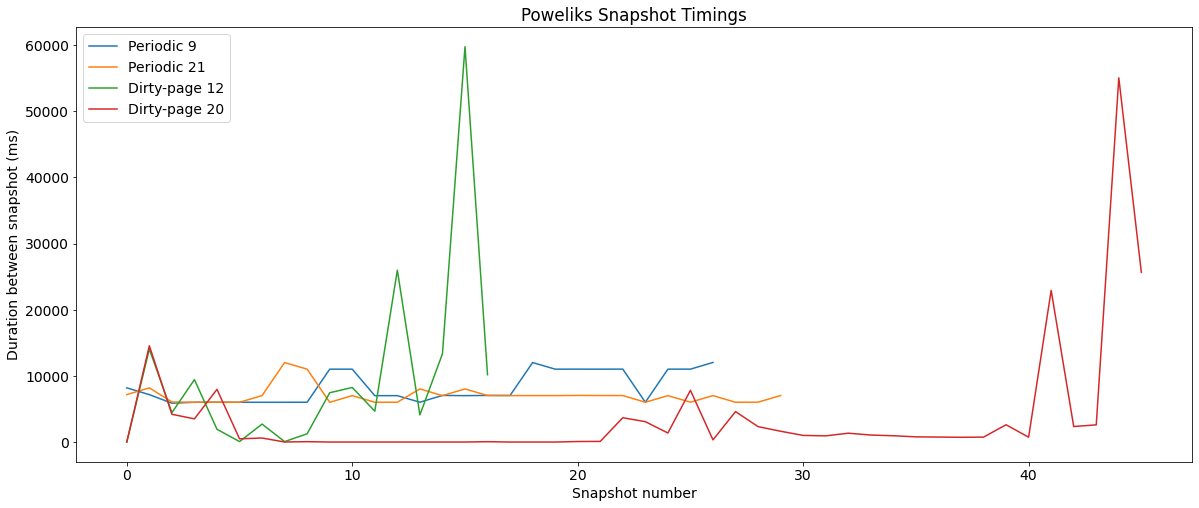

In [51]:
pl_ax = pl_timings_df.plot(title="Poweliks Snapshot Timings", kind='line')
pl_ax.set_ylabel("Duration between snapshot (ms)")
pl_ax.set_xlabel("Snapshot number")
plt.savefig("figs/poweliks_timings.pdf")

Poweliks File Sizes
--------------


In [6]:
PL_SIZE_FILES = [
    "Poweliks/Dirty-page/12/filesizes.csv",
    "Poweliks/Dirty-page/20/filesizes.csv"
]

PL_SIZES = dict()

for f in PL_SIZE_FILES:
    fields = f.split('/')
    name = "%s %s" % (fields[1], fields[2])
    pl_sizes = []
    with open(f, 'r') as fp:
        lines = fp.readlines()
    
    pl_sizes = [int(x.split(',')[1]) for x in lines[1:]]  # Skip first line heading
    PL_SIZES[name] = pl_sizes
 
# Ensure arrays have same len, fill with None (NaN) if not
max_len = max([len(row) for row in PL_SIZES.values()])
for key in PL_SIZES:
    if len(PL_SIZES[key]) < max_len:
        for i in range(max_len - len(PL_SIZES[key])):
            PL_SIZES[key].append(None)
    
    
pl_sizes_df = pd.read_json(json.dumps(PL_SIZES))
pl_sizes_df.head()



,Dirty-page 12,Dirty-page 20
0,0.000000e+00,0
1,2.152989e+09,2152988672
2,9.992839e+08,673334592
3,2.096475e+09,817522020
4,1.615086e+08,1842151261


In [7]:
pl_sizes_df.describe()


,Dirty-page 12,Dirty-page 20
count,1.800000e+01,4.700000e+01
mean,9.436075e+08,3.814086e+08
std,8.523582e+08,7.147545e+08
min,0.000000e+00,0.000000e+00
25%,2.189647e+08,7.514895e+05
50%,8.069765e+08,1.025065e+08
75%,1.305916e+09,2.939884e+08
max,2.781932e+09,3.384183e+09


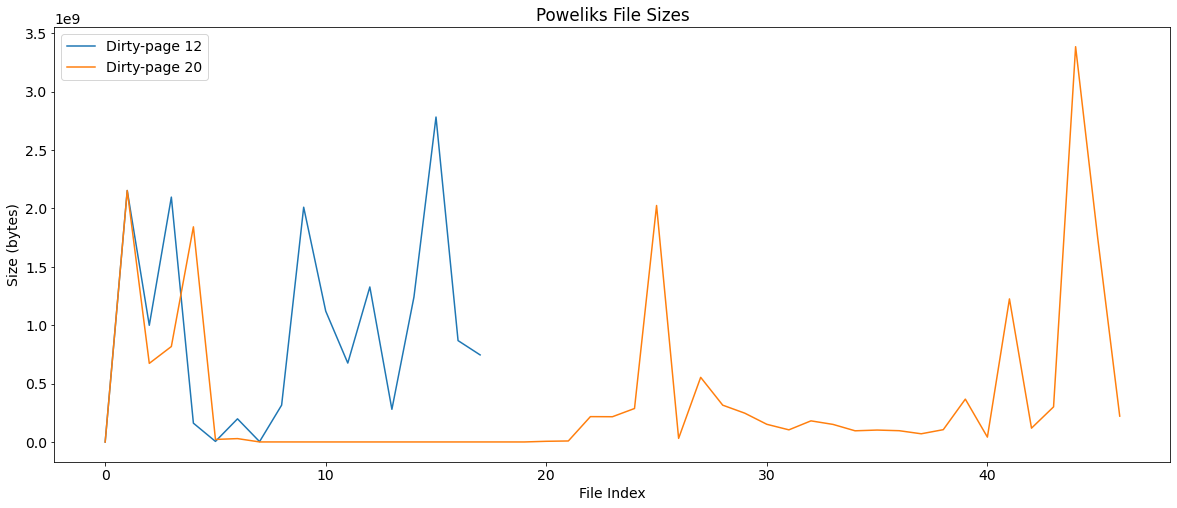

In [49]:
pl_size_ax = pl_sizes_df.plot(title="Poweliks File Sizes", kind='line')

pl_size_ax.set_xlabel("File Index")
pl_size_ax.set_ylabel("Size (bytes)")
plt.savefig("figs/poweliks_file_sizes.pdf") 

Poweliks Timings and File Sizes
-------------

In [53]:
PL_TM_FILES=[
    "Poweliks/Dirty-page/12/timings.txt",
    "Poweliks/Dirty-page/20/timings.txt"
]

PL_TM_SIZES = dict()

for f in PL_TM_FILES:
    fields = f.split('/')
    name = "%s %s (Timings)" % (fields[1], fields[2])
    pl_tm_timings = []
    with open(f, 'r') as fp:
        lines = fp.readlines()
    
    pl_tm_timings = [int(x) for x in lines[1:]]  # Skip first line heading
    PL_TM_SIZES[name] = pl_tm_timings
 


PL_TM_SIZE_FILES = [
    "Poweliks/Dirty-page/12/filesizes.csv",
    "Poweliks/Dirty-page/20/filesizes.csv"
]


for f in PL_TM_SIZE_FILES:
    fields = f.split('/')
    name = "%s %s (File Sizes)" % (fields[1], fields[2])
    pl_tm_sizes = []
    with open(f, 'r') as fp:
        lines = fp.readlines()
    
    pl_tm_sizes = [int(x.split(',')[1]) for x in lines[1:]]  # Skip first line heading
    PL_TM_SIZES[name] = pl_tm_sizes

    
# Ensure arrays have same len, fill with None (NaN) if not
max_len = max([len(row) for row in PL_TM_SIZES.values()])
for key in PL_TM_SIZES:
    if len(PL_TM_SIZES[key]) < max_len:
        for i in range(max_len - len(PL_TM_SIZES[key])):
            PL_TM_SIZES[key].append(None)
    
    
pl_tm_sizes_df = pd.read_json(json.dumps(PL_TM_SIZES))
pl_tm_sizes_df.head()


,Dirty-page 12 (Timings),Dirty-page 20 (Timings),Dirty-page 12 (File Sizes),Dirty-page 20 (File Sizes)
0,14.0,17.0,0.000000e+00,0
1,14052.0,14556.0,2.152989e+09,2152988672
2,4439.0,4198.0,9.992839e+08,673334592
3,9438.0,3508.0,2.096475e+09,817522020
4,1935.0,7967.0,1.615086e+08,1842151261


In [54]:
pl_tm_sizes_df.describe()

,Dirty-page 12 (Timings),Dirty-page 20 (Timings),Dirty-page 12 (File Sizes),Dirty-page 20 (File Sizes)
count,17.000000,46.000000,1.800000e+01,4.700000e+01
mean,9864.647059,3843.434783,9.436075e+08,3.814086e+08
std,14477.161591,9408.438965,8.523582e+08,7.147545e+08
min,14.000000,5.000000,0.000000e+00,0.000000e+00
25%,1935.000000,26.750000,2.189647e+08,7.514895e+05
50%,4668.000000,771.500000,8.069765e+08,1.025065e+08
75%,10173.000000,2611.000000,1.305916e+09,2.939884e+08
max,59753.000000,55051.000000,2.781932e+09,3.384183e+09


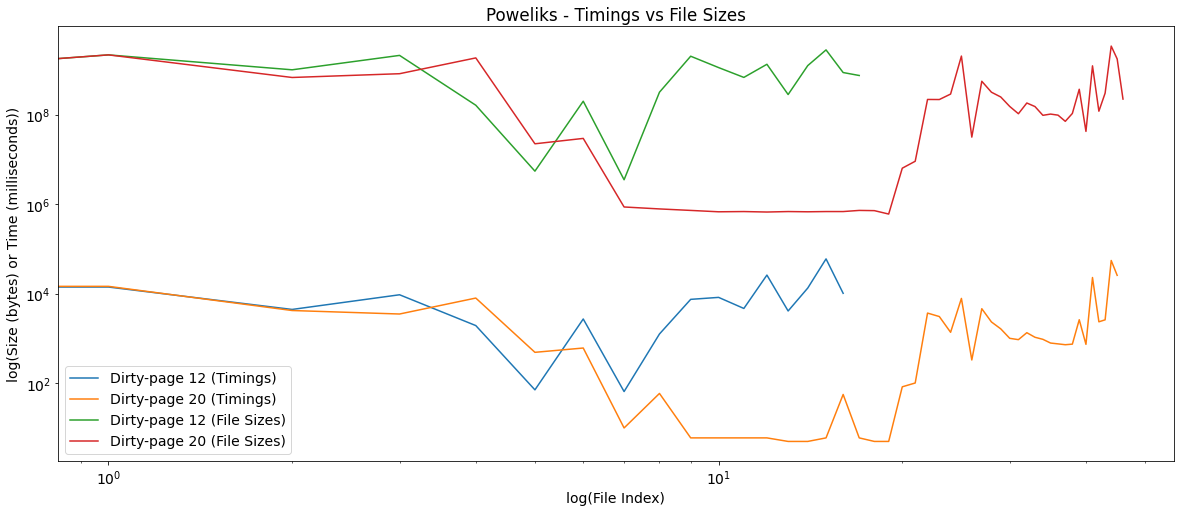

In [55]:
pl_tm_size_ax = pl_tm_sizes_df.plot(title="Poweliks - Timings vs File Sizes", kind='line', logx=True, logy=True)

pl_tm_size_ax.set_xlabel("log(File Index)")
pl_tm_size_ax.set_ylabel("log(Size (bytes) or Time (milliseconds))")
plt.savefig("figs/poweliks_tm_file_sizes.pdf") 

Page Changes
------------

In [9]:
PL_CHANGE_FILES = [
    "Poweliks/Dirty-page/12/pages_changes.csv",
    "Poweliks/Dirty-page/20/pages_changes.csv"
]

PL_CHANGES = dict()

for f in PL_CHANGE_FILES:
    fields = f.split('/')
    name = "%s %s" % (fields[1], fields[2])
    pl_changes = []
    with open(f, 'r') as fp:
        lines = fp.readlines()
    
    pl_changes = [int(x.split(',')[1]) for x in lines[1:]]  # Skip first line heading
    PL_CHANGES[name] = pl_changes
 
# Ensure arrays have same len, fill with None (NaN) if not
max_len = max([len(row) for row in PL_CHANGES.values()])
for key in PL_CHANGES:
    if len(PL_CHANGES[key]) < max_len:
        for i in range(max_len - len(PL_CHANGES[key])):
            PL_CHANGES[key].append(None)
    
    
pl_changes_df = pd.read_json(json.dumps(PL_CHANGES))
pl_changes_df.head()



,Dirty-page 12,Dirty-page 20
0,328,565
1,2,2
2,2,2
3,2,2
4,2,2


In [10]:
pl_changes_df.describe()


,Dirty-page 12,Dirty-page 20
count,262144.000000,262144.000000
mean,7.889004,8.326195
std,56.274328,54.743804
min,2.000000,2.000000
25%,4.000000,4.000000
50%,5.000000,5.000000
75%,6.000000,6.000000
max,4505.000000,4114.000000


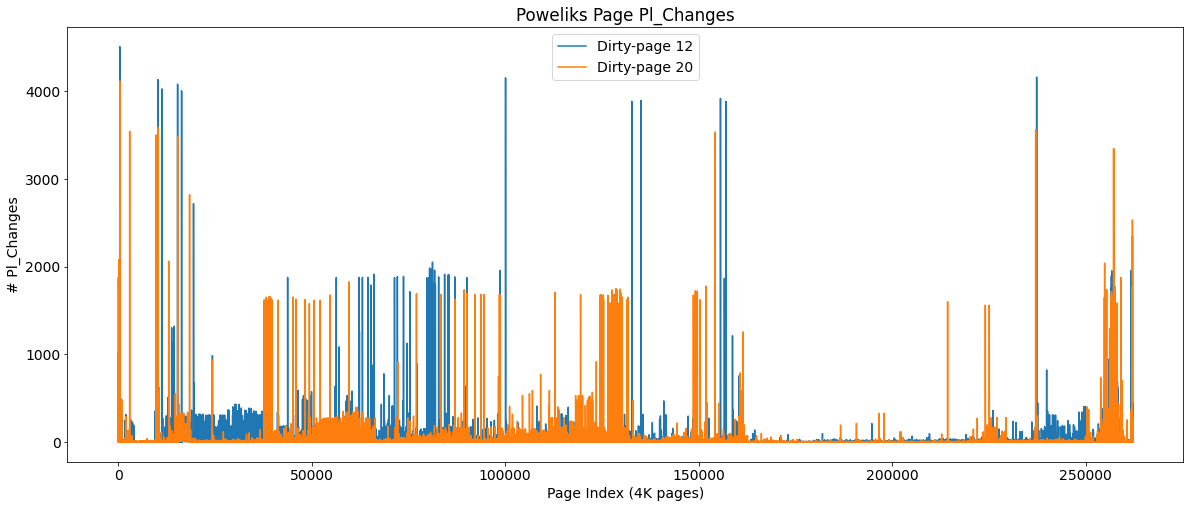

In [11]:
pl_changes_ax = pl_changes_df.plot(title="Poweliks Page Pl_Changes")

pl_changes_ax.set_xlabel("Page Index (4K pages)")
pl_changes_ax.set_ylabel("# Pl_Changes")
plt.savefig("figs/poweliks_page_changes.pdf") 


WMIGhost Timings
-------------

In [12]:
WMI_FILES=[
    "WMIGhost/Periodic/7/timings.txt",
    "WMIGhost/Periodic/18/timings.txt",
    "WMIGhost/Dirty-page/8/timings.txt",
    "WMIGhost/Dirty-page/19/timings.txt"
]

WMI_TIMINGS = dict()

for f in WMI_FILES:
    fields = f.split('/')
    name = "%s %s" % (fields[1], fields[2])
    wmi_timings = []
    with open(f, 'r') as fp:
        lines = fp.readlines()
    
    wmi_timings = [int(x) for x in lines[1:]]  # Skip first line heading
    WMI_TIMINGS[name] = wmi_timings
 
# Ensure arrays have same len, fill with None (NaN) if not
max_len = max([len(row) for row in WMI_TIMINGS.values()])
for key in WMI_TIMINGS:
    if len(WMI_TIMINGS[key]) < max_len:
        for i in range(max_len - len(WMI_TIMINGS[key])):
            WMI_TIMINGS[key].append(None)
    
    
wmi_timings_df = pd.read_json(json.dumps(WMI_TIMINGS))
wmi_timings_df.head()


,Periodic 7,Periodic 18,Dirty-page 8,Dirty-page 19
0,8194.0,7172.0,26.0,20
1,7168.0,8191.0,14357.0,12623
2,5914.0,5965.0,6116.0,8273
3,8100.0,6013.0,3316.0,8006
4,8028.0,7012.0,13226.0,14204


In [13]:
wmi_timings_df.describe()


,Periodic 7,Periodic 18,Dirty-page 8,Dirty-page 19
count,29.000000,16.000000,16.000000,106.000000
mean,7688.275862,9223.937500,11139.187500,1371.000000
std,2130.269096,4677.722501,13145.954319,4318.476658
min,5914.000000,5965.000000,26.000000,3.000000
25%,6015.000000,6026.500000,3233.500000,55.250000
50%,7016.000000,7098.500000,6538.500000,109.000000
75%,8100.000000,9760.000000,13508.750000,364.500000
max,12026.000000,23037.000000,46203.000000,33441.000000


In [14]:
wmi_timings_df.sum()

Periodic 7       222960.0
Periodic 18      147583.0
Dirty-page 8     178227.0
Dirty-page 19    145326.0
dtype: float64

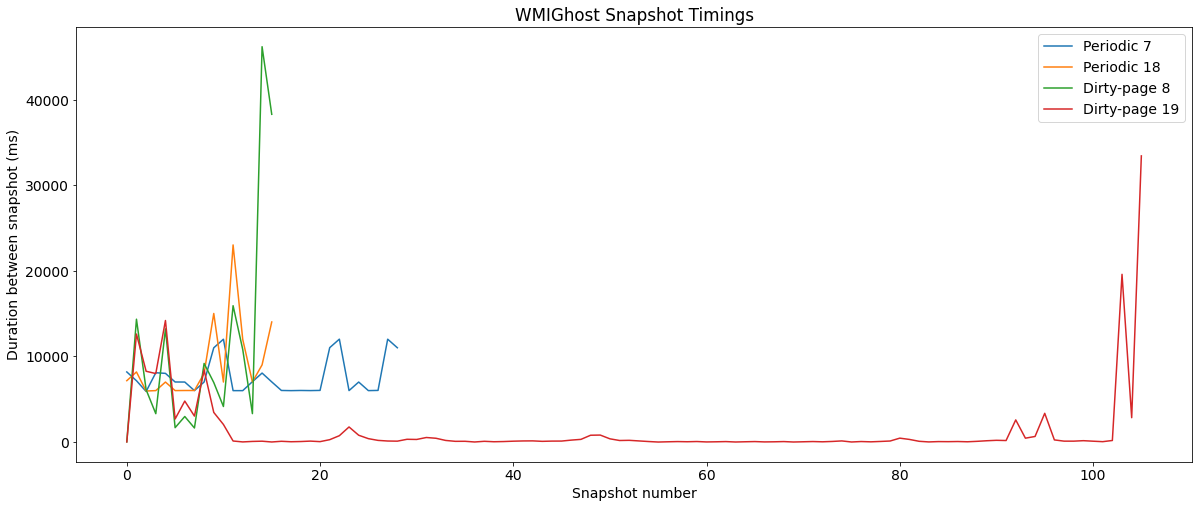

In [15]:
wmi_timings_ax = wmi_timings_df.plot(title="WMIGhost Snapshot Timings", kind='line')
wmi_timings_ax.set_ylabel("Duration between snapshot (ms)")
wmi_timings_ax.set_xlabel("Snapshot number")
plt.savefig("figs/wmighost_timings.pdf")


WMI Timings, minus run 19
---------

In [32]:
WMI2_FILES=[
    "WMIGhost/Periodic/7/timings.txt",
    "WMIGhost/Periodic/18/timings.txt",
    "WMIGhost/Dirty-page/8/timings.txt"
]

WMI2_TIMINGS = dict()

for f in WMI2_FILES:
    fields = f.split('/')
    name = "%s %s" % (fields[1], fields[2])
    wmi2_timings = []
    with open(f, 'r') as fp:
        lines = fp.readlines()
    
    wmi2_timings = [int(x) for x in lines[1:]]  # Skip first line heading
    WMI2_TIMINGS[name] = wmi2_timings
 
# Ensure arrays have same len, fill with None (NaN) if not
wmi2_max_len = max([len(row) for row in WMI2_TIMINGS.values()])
print(wmi2_max_len)
for key in WMI2_TIMINGS:
    if len(WMI2_TIMINGS[key]) < wmi2_max_len:
        for i in range(wmi2_max_len - len(WMI2_TIMINGS[key])):
            WMI2_TIMINGS[key].append(None)
    
wmi2_timings_df = pd.read_json(json.dumps(WMI2_TIMINGS))
wmi2_timings_df.head()

29


,Periodic 7,Periodic 18,Dirty-page 8
0,8194,7172.0,26.0
1,7168,8191.0,14357.0
2,5914,5965.0,6116.0
3,8100,6013.0,3316.0
4,8028,7012.0,13226.0


In [33]:
wmi2_timings_df.describe()


,Periodic 7,Periodic 18,Dirty-page 8
count,29.000000,16.000000,16.000000
mean,7688.275862,9223.937500,11139.187500
std,2130.269096,4677.722501,13145.954319
min,5914.000000,5965.000000,26.000000
25%,6015.000000,6026.500000,3233.500000
50%,7016.000000,7098.500000,6538.500000
75%,8100.000000,9760.000000,13508.750000
max,12026.000000,23037.000000,46203.000000


In [34]:
wmi2_timings_df.sum()


Periodic 7      222960.0
Periodic 18     147583.0
Dirty-page 8    178227.0
dtype: float64

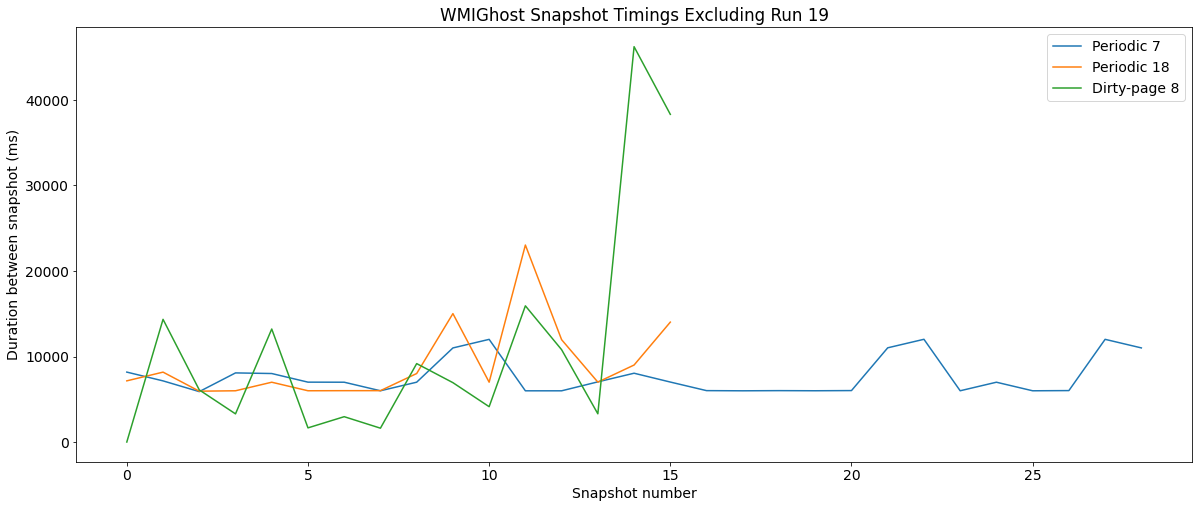

In [35]:
wmi2_timings_ax = wmi2_timings_df.plot(title="WMIGhost Snapshot Timings Excluding Run 19", kind='line')
wmi2_timings_ax.set_ylabel("Duration between snapshot (ms)")
wmi2_timings_ax.set_xlabel("Snapshot number")
plt.savefig("figs/wmighost_timings_no_run19.pdf")


WMIGhost File Sizes
-------------


In [16]:
WMI_SIZE_FILES = [
    "WMIGhost/Dirty-page/8/filesizes.csv",
    "WMIGhost/Dirty-page/19/filesizes.csv"
]

WMI_SIZES = dict()

for f in WMI_SIZE_FILES:
    fields = f.split('/')
    name = "%s %s" % (fields[1], fields[2])
    wmi_sizes = []
    with open(f, 'r') as fp:
        lines = fp.readlines()
    
    wmi_sizes = [int(x.split(',')[1]) for x in lines[1:]]  # Skip first line heading
    WMI_SIZES[name] = wmi_sizes
 
# Ensure arrays have same len, fill with None (NaN) if not
max_len = max([len(row) for row in WMI_SIZES.values()])
for key in WMI_SIZES:
    if len(WMI_SIZES[key]) < max_len:
        for i in range(max_len - len(WMI_SIZES[key])):
            WMI_SIZES[key].append(None)
    
    
wmi_sizes_df = pd.read_json(json.dumps(WMI_SIZES))
wmi_sizes_df.head()


,Dirty-page 8,Dirty-page 19
0,2.152989e+09,2152988672
1,8.340384e+08,1181793209
2,5.788358e+08,754823978
3,2.092656e+09,2152988672
4,1.364344e+08,119343103


In [17]:
wmi_sizes_df.describe()

,Dirty-page 8,Dirty-page 19
count,1.600000e+01,1.060000e+02
mean,1.066747e+09,1.713415e+08
std,9.089896e+08,4.618368e+08
min,9.542685e+07,5.174190e+05
25%,3.719935e+08,3.691744e+06
50%,6.814121e+08,1.471770e+07
75%,2.043717e+09,6.087681e+07
max,2.746361e+09,2.152989e+09


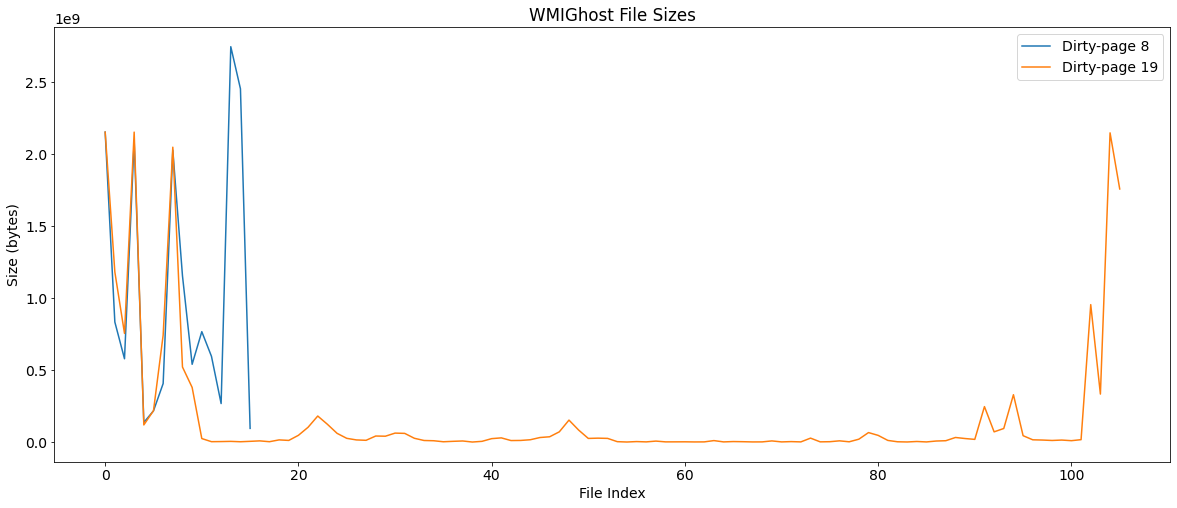

In [18]:
wmi_size_ax = wmi_sizes_df.plot(title="WMIGhost File Sizes", kind='line')

wmi_size_ax.set_xlabel("File Index")
wmi_size_ax.set_ylabel("Size (bytes)")

plt.savefig("figs/wmighost_file_sizes.pdf") 

WMIGhost Dirty-page Timings vs File Sizes
--------------------

In [56]:

WMI_TM_FILES=[
    "WMIGhost/Dirty-page/8/timings.txt",
    "WMIGhost/Dirty-page/19/timings.txt"
]

WMI_TM_SIZES = dict()

for f in WMI_TM_FILES:
    fields = f.split('/')
    name = "%s %s (Timings)" % (fields[1], fields[2])
    wmi__tm_timings = []
    with open(f, 'r') as fp:
        lines = fp.readlines()
    
    wmi__tm_timings = [int(x) for x in lines[1:]]  # Skip first line heading
    WMI_TM_SIZES[name] = wmi__tm_timings
 


WMI_TM_SIZE_FILES = [
    "WMIGhost/Dirty-page/8/filesizes.csv",
    "WMIGhost/Dirty-page/19/filesizes.csv"
]


for f in WMI_TM_SIZE_FILES:
    fields = f.split('/')
    name = "%s %s (File Sizes)" % (fields[1], fields[2])
    wmi__tm_sizes = []
    with open(f, 'r') as fp:
        lines = fp.readlines()
    
    wmi__tm_sizes = [int(x.split(',')[1]) for x in lines[1:]]  # Skip first line heading
    WMI_TM_SIZES[name] = wmi__tm_sizes

    
# Ensure arrays have same len, fill with None (NaN) if not
max_len = max([len(row) for row in WMI_TM_SIZES.values()])
for key in WMI_TM_SIZES:
    if len(WMI_TM_SIZES[key]) < max_len:
        for i in range(max_len - len(WMI_TM_SIZES[key])):
            WMI_TM_SIZES[key].append(None)
    
    
wmi__tm_sizes_df = pd.read_json(json.dumps(WMI_TM_SIZES))
wmi__tm_sizes_df.head()




,Dirty-page 8 (Timings),Dirty-page 19 (Timings),Dirty-page 8 (File Sizes),Dirty-page 19 (File Sizes)
0,26.0,20,2.152989e+09,2152988672
1,14357.0,12623,8.340384e+08,1181793209
2,6116.0,8273,5.788358e+08,754823978
3,3316.0,8006,2.092656e+09,2152988672
4,13226.0,14204,1.364344e+08,119343103


In [57]:
pl_tm_sizes_df.describe()

,Dirty-page 12 (Timings),Dirty-page 20 (Timings),Dirty-page 12 (File Sizes),Dirty-page 20 (File Sizes)
count,17.000000,46.000000,1.800000e+01,4.700000e+01
mean,9864.647059,3843.434783,9.436075e+08,3.814086e+08
std,14477.161591,9408.438965,8.523582e+08,7.147545e+08
min,14.000000,5.000000,0.000000e+00,0.000000e+00
25%,1935.000000,26.750000,2.189647e+08,7.514895e+05
50%,4668.000000,771.500000,8.069765e+08,1.025065e+08
75%,10173.000000,2611.000000,1.305916e+09,2.939884e+08
max,59753.000000,55051.000000,2.781932e+09,3.384183e+09


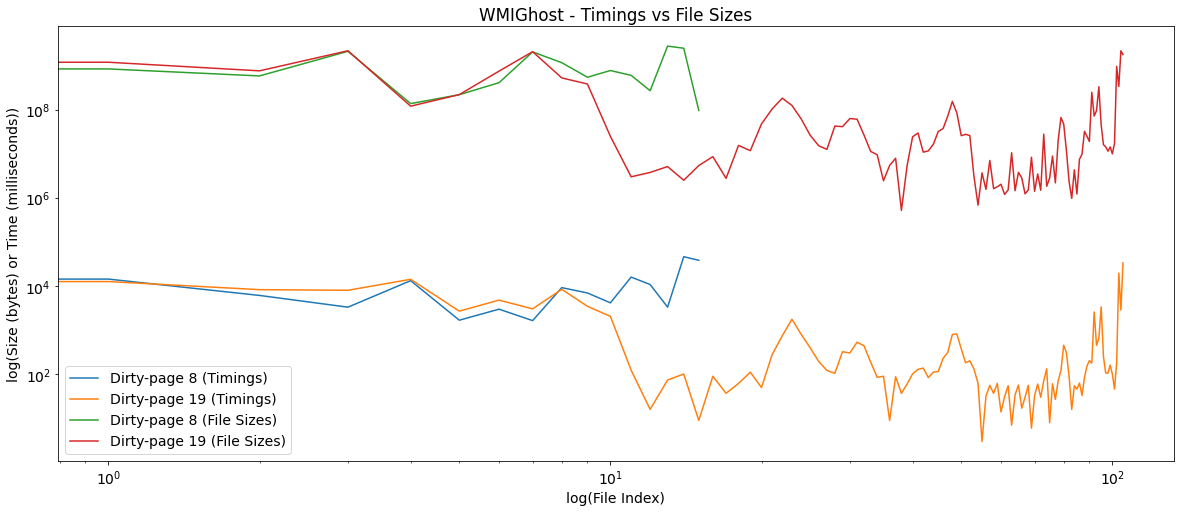

In [58]:
wmi_tm_size_ax = wmi__tm_sizes_df.plot(title="WMIGhost - Timings vs File Sizes", kind='line', logx=True, logy=True)

wmi_tm_size_ax.set_xlabel("log(File Index)")
wmi_tm_size_ax.set_ylabel("log(Size (bytes) or Time (milliseconds))")
plt.savefig("figs/wmighost_tm_file_sizes.pdf") 


WMIGhost Page Changes
-------------


In [19]:

WMI_CHANGE_FILES = [
    "WMIGhost/Dirty-page/8/page_changes.csv",
    "WMIGhost/Dirty-page/19/page_changes.csv"
]

WMI_CHANGES = dict()

for f in WMI_CHANGE_FILES:
    fields = f.split('/')
    name = "%s %s" % (fields[1], fields[2])
    wmi_changes = []
    with open(f, 'r') as fp:
        lines = fp.readlines()
    
    wmi_changes = [int(x.split(',')[1]) for x in lines[1:]]  # Skip first line heading
    WMI_CHANGES[name] = wmi_changes
 
# Ensure arrays have same len, fill with None (NaN) if not
max_len = max([len(row) for row in WMI_CHANGES.values()])
for key in WMI_CHANGES:
    if len(WMI_CHANGES[key]) < max_len:
        for i in range(max_len - len(WMI_CHANGES[key])):
            WMI_CHANGES[key].append(None)
    
    
wmi_changes_df = pd.read_json(json.dumps(WMI_CHANGES))
wmi_changes_df.head()


,Dirty-page 8,Dirty-page 19
0,339,316
1,2,2
2,2,2
3,2,2
4,2,2


In [20]:
wmi_changes_df.describe()


,Dirty-page 8,Dirty-page 19
count,262144.000000,262144.000000
mean,7.927559,8.435810
std,52.329541,43.230016
min,2.000000,2.000000
25%,4.000000,5.000000
50%,5.000000,5.000000
75%,6.000000,6.000000
max,3878.000000,3473.000000


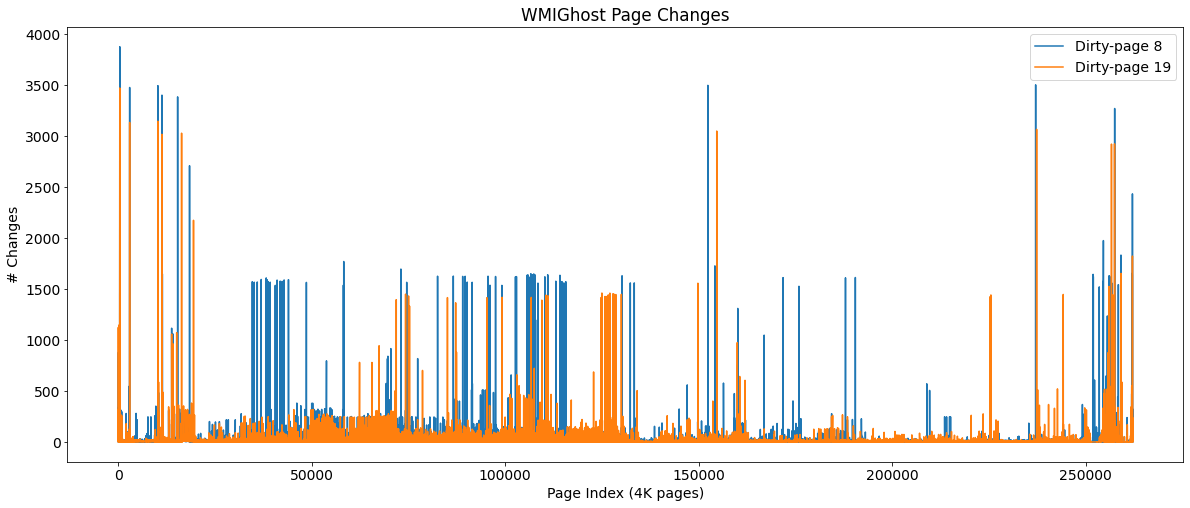

In [21]:

wmi_changes_ax = wmi_changes_df.plot(title="WMIGhost Page Changes")

wmi_changes_ax.set_xlabel("Page Index (4K pages)")
wmi_changes_ax.set_ylabel("# Changes")
plt.savefig("figs/wmighost_page_changes.pdf") 

Poweliks vs WMIGhost Page Changes
------------------


In [22]:
BOTH_CHANGE_FILES = [
    "Poweliks/Dirty-page/12/pages_changes.csv",
    "Poweliks/Dirty-page/20/pages_changes.csv",
    "WMIGhost/Dirty-page/8/page_changes.csv",
    "WMIGhost/Dirty-page/19/page_changes.csv"
]

BOTH_CHANGES = dict()

for f in BOTH_CHANGE_FILES:
    fields = f.split('/')
    name = "%s %s %s" % (fields[0], fields[1], fields[2])
    both_changes = []
    with open(f, 'r') as fp:
        lines = fp.readlines()
    
    both_changes = [int(x.split(',')[1]) for x in lines[1:]]  # Skip first line heading
    BOTH_CHANGES[name] = both_changes
 
# Ensure arrays have same len, fill with None (NaN) if not
max_len = max([len(row) for row in BOTH_CHANGES.values()])
for key in BOTH_CHANGES:
    if len(BOTH_CHANGES[key]) < max_len:
        for i in range(max_len - len(BOTH_CHANGES[key])):
            BOTH_CHANGES[key].append(None)
    
    
both_changes_df = pd.read_json(json.dumps(BOTH_CHANGES))
both_changes_df.head()


,Poweliks Dirty-page 12,Poweliks Dirty-page 20,WMIGhost Dirty-page 8,WMIGhost Dirty-page 19
0,328,565,339,316
1,2,2,2,2
2,2,2,2,2
3,2,2,2,2
4,2,2,2,2


In [23]:
both_changes_df.describe()


,Poweliks Dirty-page 12,Poweliks Dirty-page 20,WMIGhost Dirty-page 8,WMIGhost Dirty-page 19
count,262144.000000,262144.000000,262144.000000,262144.000000
mean,7.889004,8.326195,7.927559,8.435810
std,56.274328,54.743804,52.329541,43.230016
min,2.000000,2.000000,2.000000,2.000000
25%,4.000000,4.000000,4.000000,5.000000
50%,5.000000,5.000000,5.000000,5.000000
75%,6.000000,6.000000,6.000000,6.000000
max,4505.000000,4114.000000,3878.000000,3473.000000


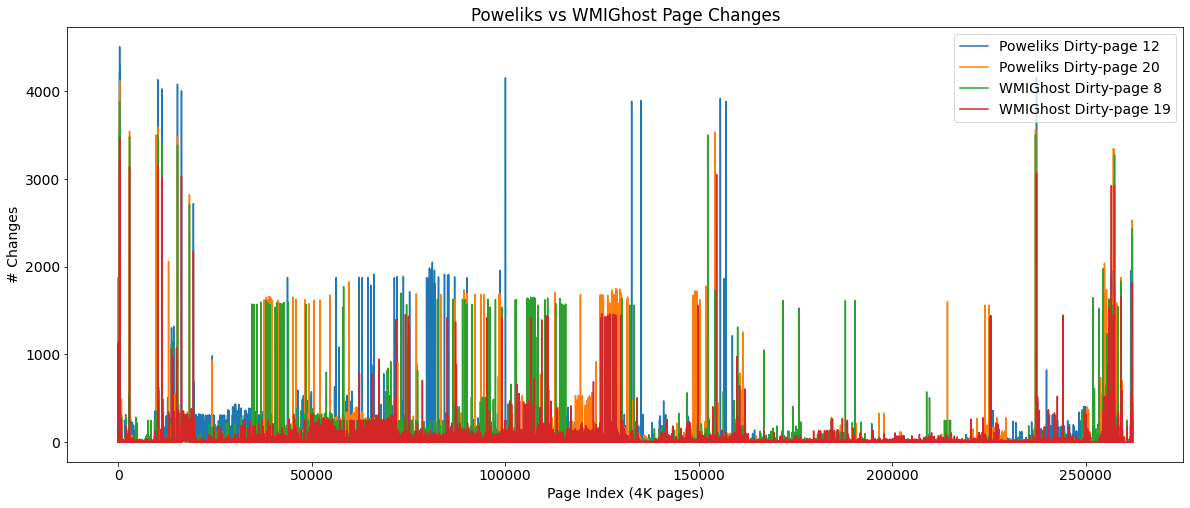

In [24]:

both_changes_ax = both_changes_df.plot(title="Poweliks vs WMIGhost Page Changes", kind='line')

both_changes_ax.set_xlabel("Page Index (4K pages)")
both_changes_ax.set_ylabel("# Changes")
plt.savefig("figs/poweliks_vs_wmighost_page_changes.pdf") 

Comparison of Dumps vs Successful Analysis
----------------------

In [114]:
FILE = "dump_vs_vol.txt"


with open(FILE, 'r') as fp:
    lines = fp.readlines()
    
DvA = dict()

name = None
for line in lines:
    line = line.strip()
    if not re.match(r'[0-9],[0-9]', line):
        # Is a new data column
        name = line
    else:
        if name is not None:
            if not name in DvA:
                DvA[name] = list()
                
            DvA[name].append(line.split(','))
        else:
            print("Unexecpected empty name")

print(DvA)

DvA_SUMS=dict()

DvA_KEYS = list(DvA.keys())
DvA_KEYS.sort()

for name in DvA_KEYS:
    DvA_SUMS[name] = dict()
    DvA_SUMS[name]['Num Dumps'] = sum([int(x[0]) for x in DvA[name]])
    DvA_SUMS[name]['Successful Analysis'] = sum([int(x[1]) for x in DvA[name]])

print(DvA_SUMS)

DvA_df = pd.read_json(json.dumps(DvA_SUMS ))
DvA_df.head()


{'Poweliks Dirty-page 12': [['1', '0'], ['1', '0'], ['1', '0'], ['1', '0'], ['1', '0'], ['1', '1'], ['1', '0'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1']], 'Poweliks Dirty-page 20': [['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1']], 'WMIGhost Dirty-page 19': [['1', '1'], ['1', '0'], ['1', '0'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1', '1'], ['1'

,Poweliks Dirty-page 12,Poweliks Dirty-page 20,Poweliks Periodic 21,Poweliks Periodic 9,WMIGhost Dirty-page 19,WMIGhost Dirty-page 8,WMIGhost Periodic 18,WMIGhost Periodic 7
Num Dumps,16,45,29,28,53,15,17,30
Successful Analysis,10,45,27,23,51,11,14,26


In [115]:
DvA_df2 = DvA_df.transpose()
DvA_df2.head()

,Num Dumps,Successful Analysis
Poweliks Dirty-page 12,16,10
Poweliks Dirty-page 20,45,45
Poweliks Periodic 21,29,27
Poweliks Periodic 9,28,23
WMIGhost Dirty-page 19,53,51


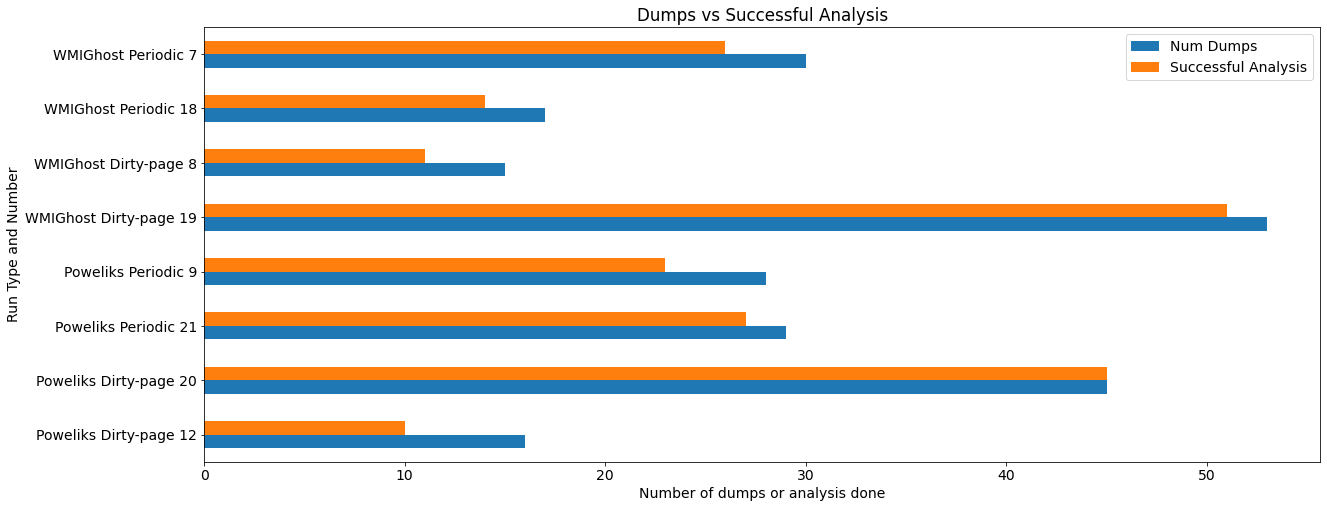

In [120]:
DvA_ax = DvA_df2.plot(title="Dumps vs Successful Analysis", kind='barh')

DvA_ax.set_ylabel("Run Type and Number")
DvA_ax.set_xlabel("Number of dumps or analysis done")
plt.savefig("figs/dumps_vs_analysis.pdf") 